# Análisis de Hiperparámetros para Ajedrez Vikingo

En este notebook, analizaremos los datos proporcionados para determinar la mejor configuración de hiperparámetros para los jugadores de ajedrez, diferenciando entre las blancas y las negras.

## MCTS 

### Lectura de datos

In [80]:
import pandas as pd

df = pd.read_csv('./results/result_mcts.csv')
df.head()

,simulations_number_whites,exploration_factor_whites,simulations_number_blacks,exploration_factor_blacks,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result
0,100,1.0,100,0.0,0.950926,8.0,0.950926,3,Ganan blancas
1,100,1.0,100,0.0,1.017034,3.0,1.017034,6,Ganan blancas
2,100,1.0,100,0.0,1.089101,1.0,1.089101,6,Ganan negras
3,100,1.0,100,0.0,1.042461,3.0,1.042461,0,Ganan negras
4,100,1.0,100,0.0,1.067558,7.0,1.067558,3,Ganan blancas


## Preprocesado

En esta sección preprocesaremos el dataset para asignar el nombre de los agentes implicados en una partida al dataset a través de sus hiperparámetros. Durante el experimento, los 4 agentes que se han probado contaban con las siguientes características:

In [81]:
from math import sqrt

agentes = {
    "Agente MCTS 1": {
        "simulations_number": 100,
        "exploration_factor": 1,
    },
    "Agente MCTS 2": {
        "simulations_number": 100,
        "exploration_factor": 0,
    },
    "Agente MCTS 3": {
        "simulations_number": 100,
        "exploration_factor": 0.5,
    },
    "Agente MCTS 4": {
        "simulations_number": 200,
        "exploration_factor": 1 / sqrt(2),
        
    },
}

In [82]:
datos = df.copy()

# Creamos un mapeo inverso basado en simulations_number y exploration_factor para cada agente
agent_mapping = {
    (agent_info["simulations_number"], agent_info["exploration_factor"]): idx 
    for idx, agent_info in agentes.items()
}

# Función para obtener el nombre del agente basado en simulations_number y exploration_factor
def get_agent_name(simulations_number, exploration_factor):
    return agent_mapping.get((simulations_number, exploration_factor))

# Aplicamos la transformación para crear las nuevas columnas 'whites' y 'blacks'
datos['whites'] = datos.apply(lambda row: get_agent_name(row['simulations_number_whites'], row['exploration_factor_whites']), axis=1)
datos['blacks'] = datos.apply(lambda row: get_agent_name(row['simulations_number_blacks'], row['exploration_factor_blacks']), axis=1)

# Eliminamos las columnas originales
datos = datos.drop(columns=[
    'simulations_number_whites',
    'exploration_factor_whites',
    'simulations_number_blacks',
    'exploration_factor_blacks'
])

datos.head()


,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result,whites,blacks
0,0.950926,8.0,0.950926,3,Ganan blancas,Agente MCTS 1,Agente MCTS 2
1,1.017034,3.0,1.017034,6,Ganan blancas,Agente MCTS 1,Agente MCTS 2
2,1.089101,1.0,1.089101,6,Ganan negras,Agente MCTS 1,Agente MCTS 2
3,1.042461,3.0,1.042461,0,Ganan negras,Agente MCTS 1,Agente MCTS 2
4,1.067558,7.0,1.067558,3,Ganan blancas,Agente MCTS 1,Agente MCTS 2


## Visualización

Cada agente tiene un número de simulaciones y un factor de exploración. El número de simulaciones indica cuántas simulaciones se realizarán para cada movimiento posible en cada turno. El factor de exploración indica la importancia relativa de la exploración (movimientos aleatorios) frente a la explotación (movimientos basados en la experiencia). Se ha enfrentado entre sí a cada agente, alternando el color de las fichas en cada partida.

In [83]:
def calcula_numero_victorias(datos, agente, color="blancas"):
    
    if color == "blancas":
        return len(datos[(datos["result"]=="Ganan blancas") & (datos["whites"]==agente)]) # Se calcula el número de enfrentamientos que ha ganado el agente con las fichas blancas
    elif color == "negras":
        return len(datos[(datos["result"]=="Ganan negras") & (datos["blacks"]==agente)]) # Se calcula el número de enfrentamientos que ha ganado el agente con las fichas negras
    else:
        raise AttributeError("El atributo 'color' deber tomar el valor 'blancas' o 'negras'")

victorias_con_blancas = {}
victorias_con_negras = {}

for agente in agentes:
    victorias_con_blancas[agente] = calcula_numero_victorias(datos, agente)
    victorias_con_negras[agente] = calcula_numero_victorias(datos, agente, color="negras")
    
print(f"Victorias con blancas:\n{victorias_con_blancas}")
print(f"Victorias con negras:\n{victorias_con_negras}")

Victorias con blancas:
{'Agente MCTS 1': 11, 'Agente MCTS 2': 13, 'Agente MCTS 3': 12, 'Agente MCTS 4': 12}
Victorias con negras:
{'Agente MCTS 1': 0, 'Agente MCTS 2': 5, 'Agente MCTS 3': 2, 'Agente MCTS 4': 5}


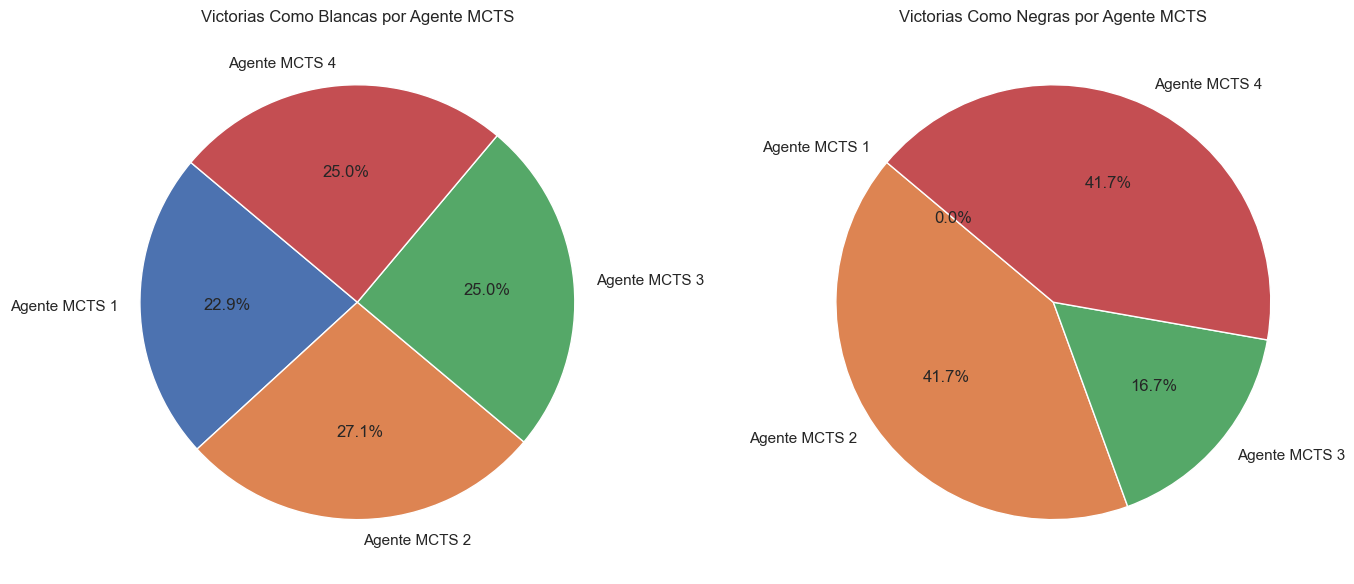

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(victorias_con_blancas.values(), labels=victorias_con_blancas.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title('Victorias Como Blancas por Agente MCTS')

axs[1].pie(victorias_con_negras.values(), labels=victorias_con_negras.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title('Victorias Como Negras por Agente MCTS')

plt.tight_layout()
plt.show()

Se puede observar que agente ha conseguido más victorias; para las blancas el agente 2 es el ganador, mientras que para las negras hay un empate entre el agente 4 y 2.

In [85]:
def create_strip_plot(data, y, title):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.stripplot(data=data, x="whites", y=f"{y}_whites", ax=axs[0])
    sns.stripplot(data=data, x="blacks", y=f"{y}_blacks", ax=axs[1])
    
    axs[0].set_title(title + " al jugar con blancas")
    axs[1].set_title(title + " al jugar con negras")
    
    plt.show()

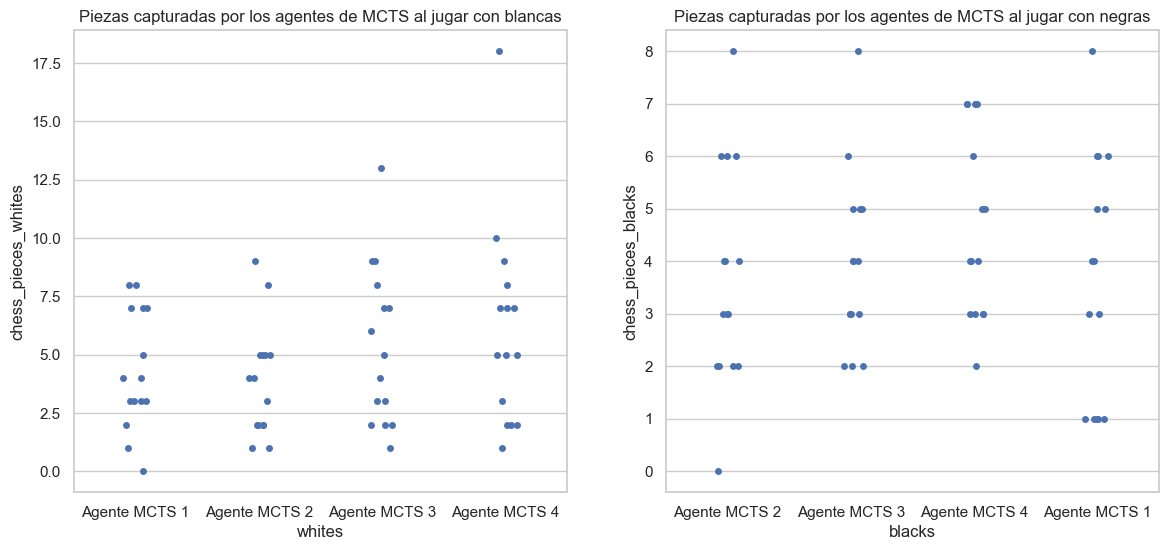

In [86]:
create_strip_plot(datos, "chess_pieces", "Piezas capturadas por los agentes de MCTS")

In [87]:
def calcula_medias_variable(datos, variable):

    # Calculamos las medias de capturas por agente para cada color
    capturas_agentes_blancas = datos.groupby("whites")[f"{variable}_whites"].mean()
    capturas_agentes_negras = datos.groupby("blacks")[f"{variable}_blacks"].mean()

    # Creamos DataFrames a partir de las series anteriores
    capturas_agentes_blancas = capturas_agentes_blancas.reset_index().rename(columns={"whites": "Agente", f"{variable}_whites": "Blancas"})
    capturas_agentes_negras = capturas_agentes_negras.reset_index().rename(columns={"blacks": "Agente", f"{variable}_blacks": "Negras"})

    # Unimos los DataFrames en uno solo usando 'Agente' como clave
    capturas_agentes = pd.merge(capturas_agentes_blancas, capturas_agentes_negras, on="Agente")

    return capturas_agentes

          Agente   Blancas    Negras
0  Agente MCTS 1  4.333333  3.666667
1  Agente MCTS 2  3.866667  3.666667
2  Agente MCTS 3  5.400000  3.933333
3  Agente MCTS 4  6.066667  4.666667


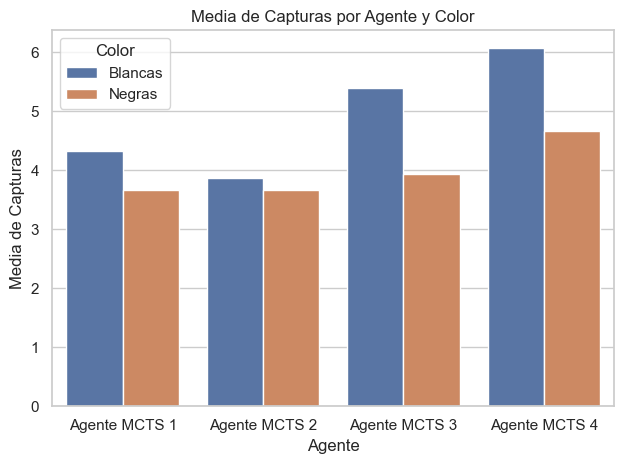

In [88]:
capturas_agentes = calcula_medias_variable(datos, "chess_pieces")

print(capturas_agentes)

# Extendemos el dataframe para que exista una columna 'Color' que indique si la ficha es blanca o negra
captura_agentes_extendido = pd.melt(capturas_agentes, id_vars=['Agente'], value_vars=['Blancas', 'Negras'],
                                var_name='Color', value_name='Media Capturas')

# Mostramos la gráfica
ax = sns.barplot(x='Agente', y='Media Capturas', hue='Color', data=captura_agentes_extendido)

plt.title('Media de Capturas por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Capturas')
plt.legend(title='Color')

plt.tight_layout()
plt.show()

Hemos mostrado la media de fichas capturadas por cada agente jugando con colores distintos. Previamente, para las fichas blancas vimos que el agente 2 había conseguido, por muy poco, el agente con más victorias y comparandolos con esta gráfica podemos observar que es el que menos fichas ha capturado para el color blanco, siendo el agente 4 el que más fichas ha capturado. Viendo las fichas negras, el agente 4 es el que ha obtenido la mayor media de fichas capturadas.

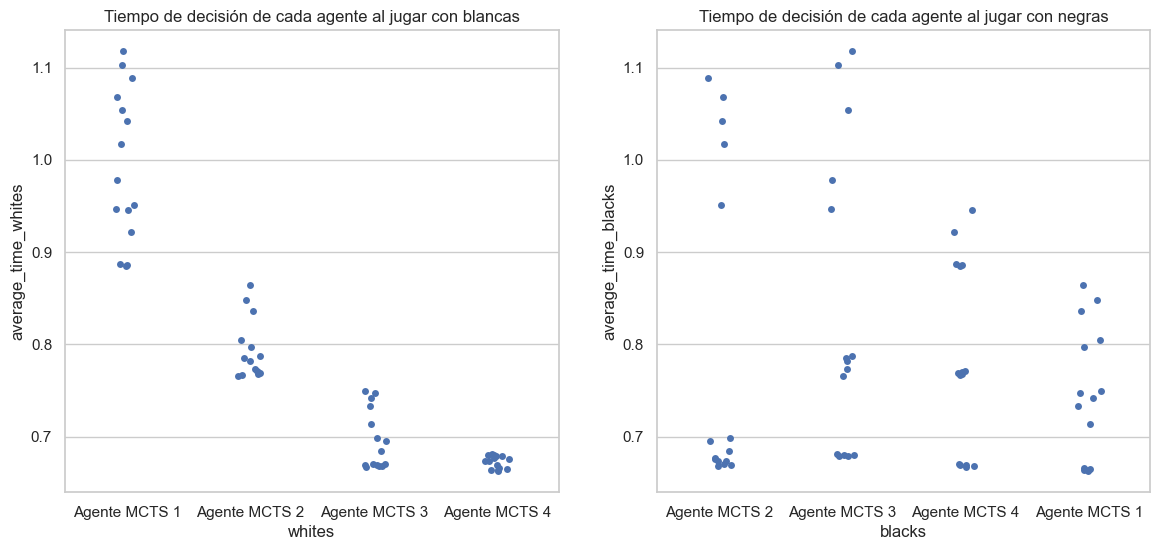

In [89]:
create_strip_plot(datos, 'average_time', 'Tiempo de decisión de cada agente')

Esta gráfica muestra la relación entre el tiempo promedio de juego para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas al final de la partida. Los diferentes colores representan los distintos resultados de las partidas. Esta gráfica puede ayudar a entender si un juego más largo o más corto beneficia a las blancas en términos de cantidad de piezas restantes o en la probabilidad de ganar la partida.

Similar a la anterior pero para las fichas negras. Muestra cómo el tiempo promedio de juego para las negras se relaciona con la cantidad de piezas de ajedrez capturadas por las negras al final de la partida, también diferenciado por los resultados de las partidas. Esta gráfica es útil para determinar si las partidas más largas o más cortas favorecen a las negras en términos de supervivencia de piezas o victorias.

          Agente   Blancas    Negras
0  Agente MCTS 1  0.992865  0.743806
1  Agente MCTS 2  0.792448  0.796804
2  Agente MCTS 3  0.696470  0.832708
3  Agente MCTS 4  0.672507  0.780972


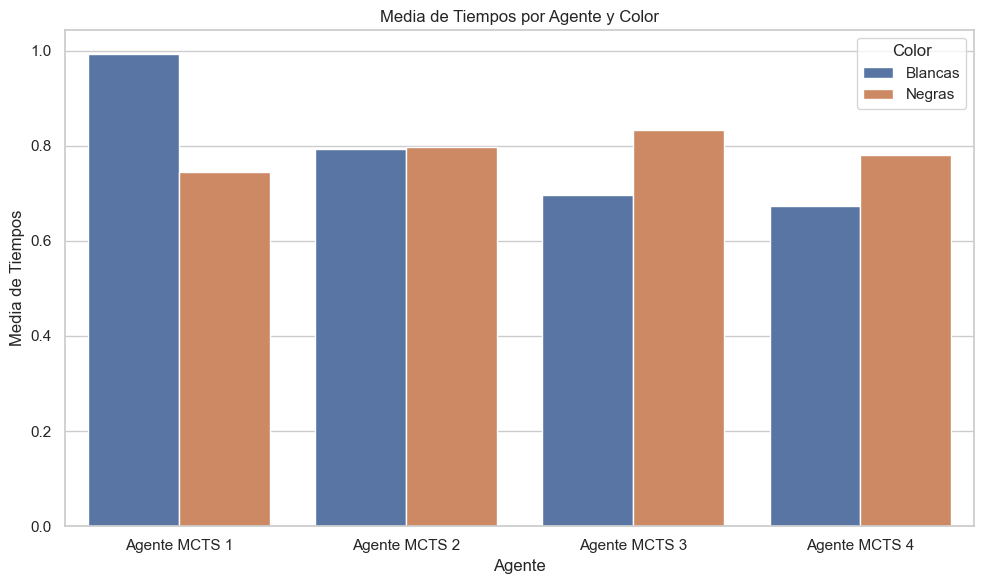

In [90]:
tiempo_agentes = calcula_medias_variable(datos, "average_time")

print(tiempo_agentes)

# Extendemos el dataframe para que exista una columna 'Color' que indique si la ficha es blanca o negra
tiempo_agentes_extendido = pd.melt(tiempo_agentes, id_vars=['Agente'], value_vars=['Blancas', 'Negras'],
                                var_name='Color', value_name='Media_Tiempos')

# Mostramos la gráfica
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Agente', y='Media_Tiempos', hue='Color', data=tiempo_agentes_extendido)

plt.title('Media de Tiempos por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Tiempos')
plt.legend(title='Color')

plt.tight_layout()
plt.show()

Ahora podemos observar que es el agente 4 el que ha conseguido una mejor media de tiempos para las blancas, y siendo el agente 1 para las negras.

In [91]:
sns.set(style="whitegrid")

def create_bar_plot(data, x_column, y_column, title):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.barplot(data=data, x=f"{x_column}_whites", y=f"{y_column}_whites", ax=axs[0])
    sns.barplot(data=data, x=f"{x_column}_blacks", y=f"{y_column}_blacks", ax=axs[1])
    
    axs[0].set_title(title + " al jugar con blancas")
    axs[1].set_title(title + " al jugar con negras")

    plt.show()

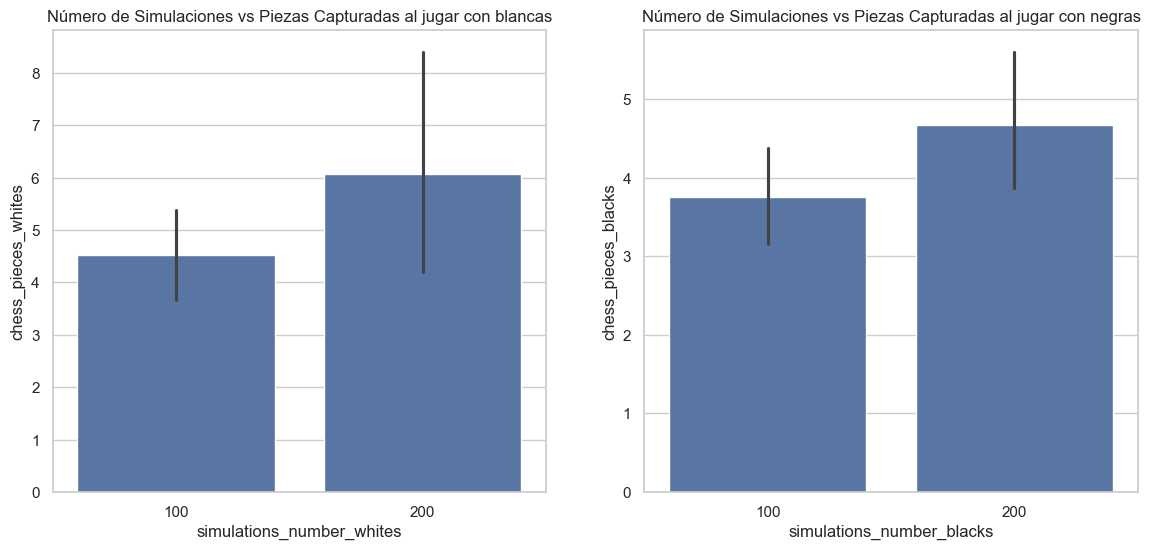

In [92]:
create_bar_plot(df, 'simulations_number', 'chess_pieces', 'Número de Simulaciones vs Piezas Capturadas')

Esta gráfica muestra cómo el número de simulaciones realizadas para las fichas blancas se relaciona con la cantidad de piezas de ajedrez capturadas por las blancas.

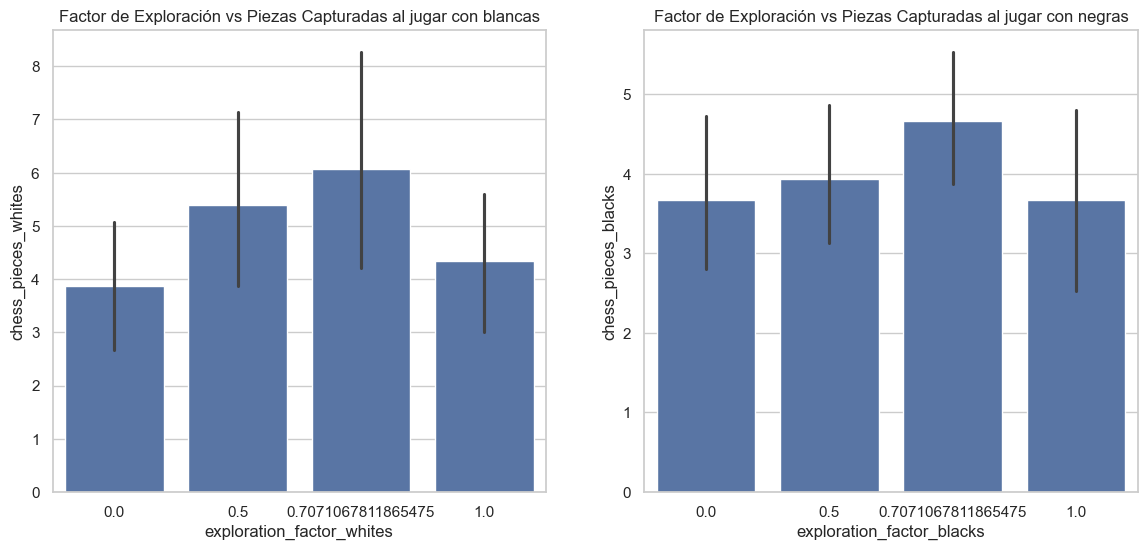

In [93]:
create_bar_plot(df, 'exploration_factor', 'chess_pieces', 'Factor de Exploración vs Piezas Capturadas')

Esta gráfica muestra la relación entre el factor de exploración para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas.

### Conclusiones

In [94]:
def evaluar_agentes(datos, color):
    # Filtrar los resultados según el color de las piezas
    if color == 'blancas':
        columna_agrupacion = "whites"
        columna_tiempo = 'average_time_whites'
        columna_fichas = 'chess_pieces_whites'
        condicion_victoria = datos['result'] == 'Ganan blancas'
    else:
        columna_agrupacion = "blacks"
        columna_tiempo = 'average_time_blacks'
        columna_fichas = 'chess_pieces_blacks'
        condicion_victoria = datos['result'] == 'Ganan negras'
    
    # Calcular métricas de rendimiento
    resultados = datos.groupby(columna_agrupacion).apply(
        lambda x: pd.Series({
            'Ratio_Victorias': x[condicion_victoria].shape[0] / x.shape[0],
            'Fichas_Promedio': x[columna_fichas].mean(),
            'Tiempo_Promedio': x[columna_tiempo].mean()
        })
    )
    
    # Ordenar por Ratio de Victorias, luego por Fichas Promedio y finalmente por Tiempo Promedio
    resultados_ordenados = resultados.sort_values(by=['Ratio_Victorias', 'Fichas_Promedio', 'Tiempo_Promedio'], ascending=[False, False, True])
    
    return resultados_ordenados


In [95]:
import warnings
warnings.filterwarnings('ignore')

resultados_blancas = evaluar_agentes(datos, 'blancas')
resultados_blancas

,Ratio_Victorias,Fichas_Promedio,Tiempo_Promedio
whites,,,
Agente MCTS 2,0.866667,3.866667,0.792448
Agente MCTS 4,0.800000,6.066667,0.672507
Agente MCTS 3,0.800000,5.400000,0.696470
Agente MCTS 1,0.733333,4.333333,0.992865


In [96]:
resultados_negras = evaluar_agentes(datos, 'negras')
resultados_negras

,Ratio_Victorias,Fichas_Promedio,Tiempo_Promedio
blacks,,,
Agente MCTS 4,0.333333,4.666667,0.780972
Agente MCTS 2,0.333333,3.666667,0.796804
Agente MCTS 3,0.133333,3.933333,0.832708
Agente MCTS 1,0.000000,3.666667,0.743806


Estos valores representan las configuraciones más comunes entre los juegos ganados por las fichas blancas y negras, respectivamente. Para las blancas la mejor configuración sería la del Agente 2, mientras que para las negras habría que tener en cuenta las gráficas anteriores porque a pesar de que tanto el Agente 2 como el 4 habían ganado el mismo porcentaje de partidas, pero el Agente 4 había conseguido mejor rendimiento en captura de fichas y tiempo, por lo que para las negras la mejor configuración es el agente 4.

Por tanto, la configuración de blancas sería:
* **Número de simulaciones:** 100
* **Factor de exploración:** 0.0

Y para negras sería:
* **Número de simulaciones:** 100
* **Factor de exploración:** $ \frac{1}{\sqrt{2}} $



## Q-Learning

### Lectura de datos

In [97]:
df = pd.read_csv('./results/result_qlearning.csv')
df.head()

,learning_rate_whites,initial_epsilon_whites,epsilon_decay_whites,final_epsilon_whites,learning_rate_blacks,initial_epsilon_blacks,epsilon_decay_blacks,final_epsilon_blacks,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result
0,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000138,1.0,0.000138,8.0,Ganan negras
1,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000126,6.0,0.000126,4.0,Ganan negras
2,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000123,7.0,0.000123,3.0,Ganan blancas
3,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000125,11.0,0.000125,5.0,Ganan blancas
4,0.2,0.9,0.85,0.05,0.05,0.5,0.95,0.2,0.000123,4.0,0.000123,5.0,Ganan negras


## Preprocesado

En esta sección preprocesaremos el dataset para asignar el nombre de los agentes implicados en una partida al dataset a través de sus hiperparámetros. Durante el experimento, los 4 agentes que se han probado contaban con las siguientes características:

In [98]:
agentes = {
    "Agente Q1": {
        "learning_rate": 0.2,
        "initial_epsilon": 0.9,
        "epsilon_decay": 0.85,
        "final_epsilon": 0.05
    },
    "Agente Q2": {
        "learning_rate": 0.05,
        "initial_epsilon": 0.5,
        "epsilon_decay": 0.95,
        "final_epsilon": 0.2
    },
    "Agente Q3": {
        "learning_rate": 0.15,
        "initial_epsilon": 0.8,
        "epsilon_decay": 0.92,
        "final_epsilon": 0.1
    },
    "Agente Q4": {
        "learning_rate": 0.07,
        "initial_epsilon": 0.7,
        "epsilon_decay": 0.97,
        "final_epsilon": 0.15
    }
}

In [99]:
datos = df.copy()

# Creamos un mapeo inverso basado en los hiperparámetros de cada agente
agent_mapping = {
    (agent_info["learning_rate"], 
     agent_info["initial_epsilon"], 
     agent_info["epsilon_decay"], 
     agent_info["final_epsilon"]): idx 
    
    for idx, agent_info in agentes.items()
}

# Función para obtener el nombre del agente a partir de sus hiperparámetros
def get_agent_name(learning_rate, initial_epsilon, epsilon_decay, final_epsilon):
    return agent_mapping.get((learning_rate, initial_epsilon, epsilon_decay, final_epsilon))

# Aplicamos la transformación para crear las nuevas columnas 'whites' y 'blacks'
datos['whites'] = datos.apply(lambda row: get_agent_name(row["learning_rate_whites"], row["initial_epsilon_whites"], row["epsilon_decay_whites"], row["final_epsilon_whites"]), axis=1)
datos['blacks'] = datos.apply(lambda row: get_agent_name(row["learning_rate_blacks"], row["initial_epsilon_blacks"], row["epsilon_decay_blacks"], row["final_epsilon_blacks"]), axis=1)

# Eliminamos las columnas originales
datos = datos.drop(columns=[
    'learning_rate_whites',
    'initial_epsilon_whites',
    'epsilon_decay_whites',
    'final_epsilon_whites',
    'learning_rate_blacks',
    'initial_epsilon_blacks',
    'epsilon_decay_blacks',
    'final_epsilon_blacks'
])

datos.head()

,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result,whites,blacks
0,0.000138,1.0,0.000138,8.0,Ganan negras,Agente Q1,Agente Q2
1,0.000126,6.0,0.000126,4.0,Ganan negras,Agente Q1,Agente Q2
2,0.000123,7.0,0.000123,3.0,Ganan blancas,Agente Q1,Agente Q2
3,0.000125,11.0,0.000125,5.0,Ganan blancas,Agente Q1,Agente Q2
4,0.000123,4.0,0.000123,5.0,Ganan negras,Agente Q1,Agente Q2


## Visualización 

Para cada agente se ha definido una tasa de aprendizaje, un valor inicial de epsilon, un factor de decaimiento de epsilon y un valor final de epsilon. La tasa de aprendizaje indica la importancia relativa de los nuevos conocimientos frente a los antiguos. El valor inicial de epsilon indica la importancia relativa de la exploración (movimientos aleatorios) frente a la explotación (movimientos basados en la experiencia) al comienzo del entrenamiento. El factor de decaimiento de epsilon indica la rapidez con la que se reduce la importancia de la exploración a lo largo del entrenamiento. El valor final de epsilon indica la importancia relativa de la exploración al final del entrenamiento. Se ha enfrentado entre sí a cada agente, alternando el color de las fichas en cada partida.

In [100]:
victorias_con_blancas = {}
victorias_con_negras = {}

for agente in agentes:
    victorias_con_blancas[agente] = calcula_numero_victorias(datos, agente)
    victorias_con_negras[agente] = calcula_numero_victorias(datos, agente, "negras")
    
print(f"Victorias con blancas:\n{victorias_con_blancas}")
print(f"Victorias con negras:\n{victorias_con_negras}")

Victorias con blancas:
{'Agente Q1': 8, 'Agente Q2': 6, 'Agente Q3': 7, 'Agente Q4': 8}
Victorias con negras:
{'Agente Q1': 8, 'Agente Q2': 6, 'Agente Q3': 7, 'Agente Q4': 9}


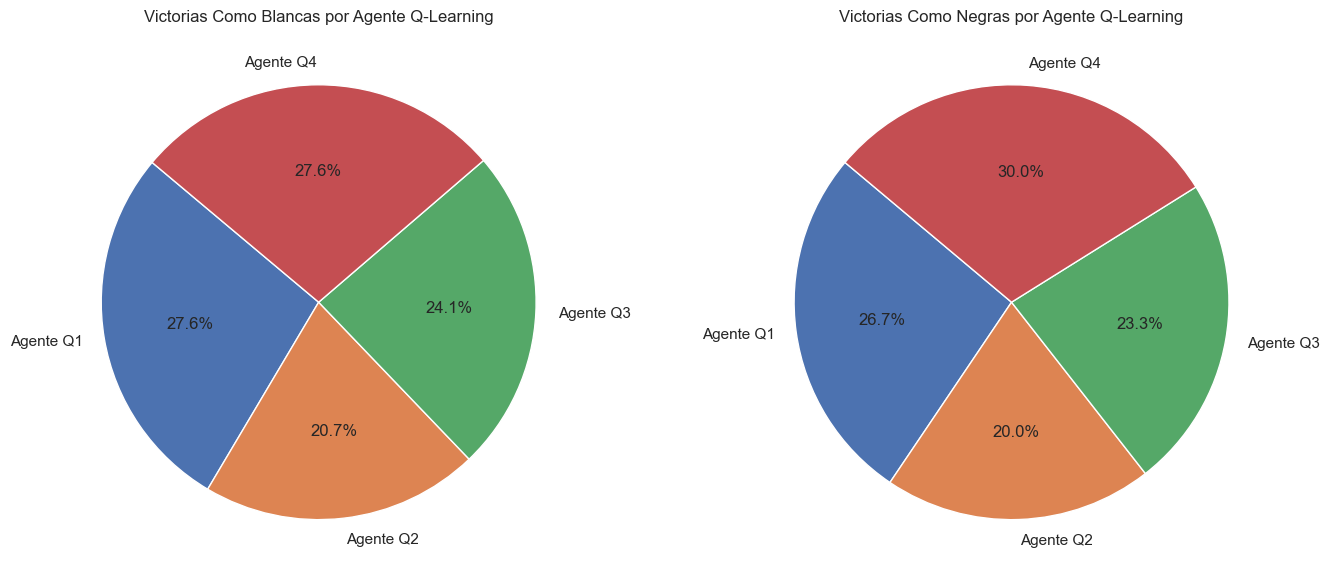

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(victorias_con_blancas.values(), labels=victorias_con_blancas.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title('Victorias Como Blancas por Agente Q-Learning')

axs[1].pie(victorias_con_negras.values(), labels=victorias_con_negras.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title('Victorias Como Negras por Agente Q-Learning')

plt.tight_layout()
plt.show()

Observamos que, de todos los agentes, el agente 1 y 4 son los que han conseguido un mayor porcentaje de partidas ganadas usando las fichas blancas. Mientras, para las negras el agente 4 es el que ha conseguido un mayor número de victorias.

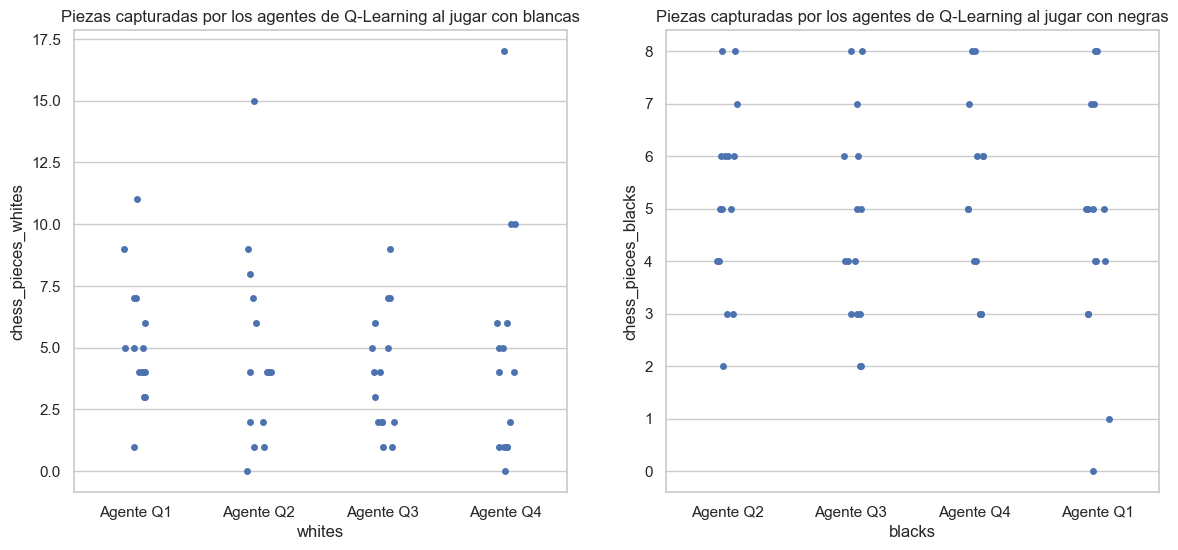

In [102]:
create_strip_plot(datos, "chess_pieces", "Piezas capturadas por los agentes de Q-Learning")

      Agente   Blancas    Negras
0  Agente Q1  5.200000  4.600000
1  Agente Q2  4.785714  5.200000
2  Agente Q3  4.000000  4.666667
3  Agente Q4  4.866667  5.071429


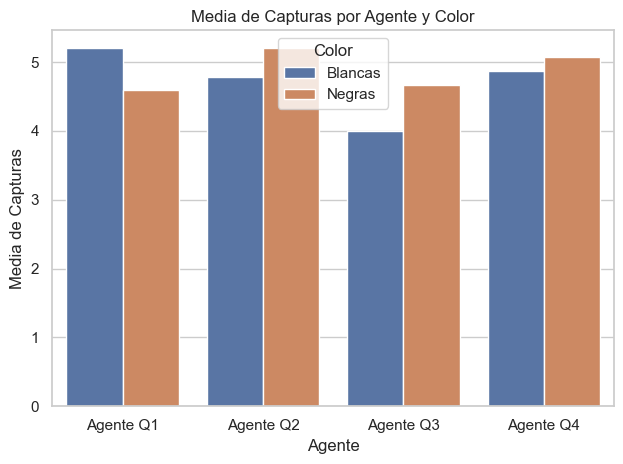

In [103]:
capturas_agentes = calcula_medias_variable(datos, "chess_pieces")

print(capturas_agentes)

# Extendemos el dataframe para que exista una columna 'Color' que indique si la ficha es blanca o negra
captura_agentes_extendido = pd.melt(capturas_agentes, id_vars=['Agente'], value_vars=['Blancas', 'Negras'],
                                var_name='Color', value_name='Media Capturas')

# Mostramos la gráfica
ax = sns.barplot(x='Agente', y='Media Capturas', hue='Color', data=captura_agentes_extendido)

plt.title('Media de Capturas por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Capturas')
plt.legend(title='Color')

plt.tight_layout()
plt.show()

Observando la media de capturas por agente y color, podemos ver como el agente 1 es el que mayor media tiene para las blancas, mientras que el agente 2 para las negras.

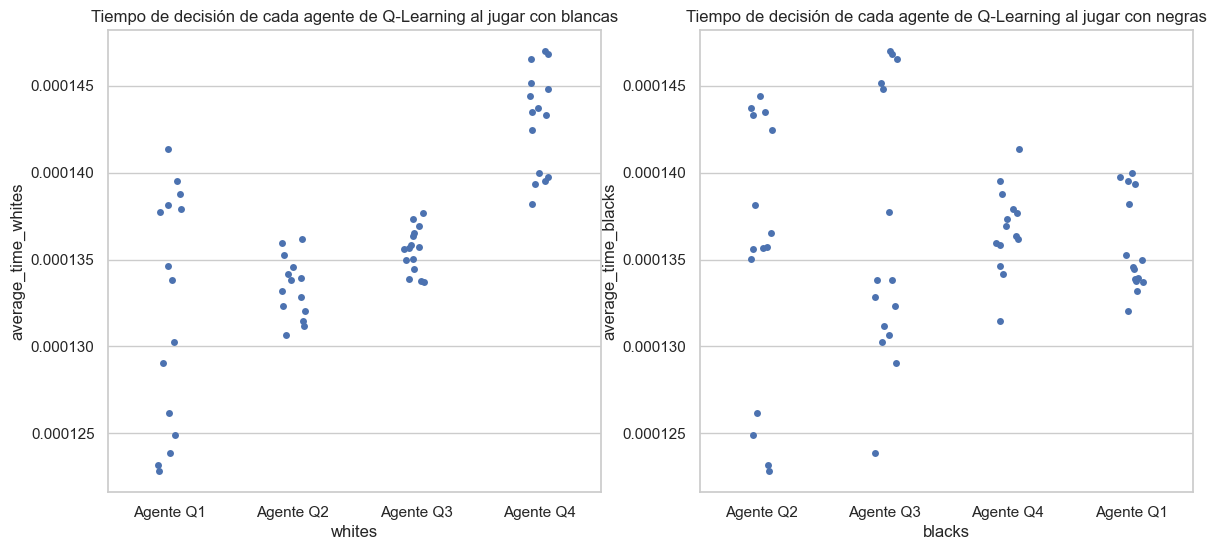

In [104]:
create_strip_plot(datos, 'average_time', 'Tiempo de decisión de cada agente de Q-Learning')

      Agente   Blancas    Negras
0  Agente Q1  0.000132  0.000136
1  Agente Q2  0.000133  0.000135
2  Agente Q3  0.000136  0.000136
3  Agente Q4  0.000143  0.000137


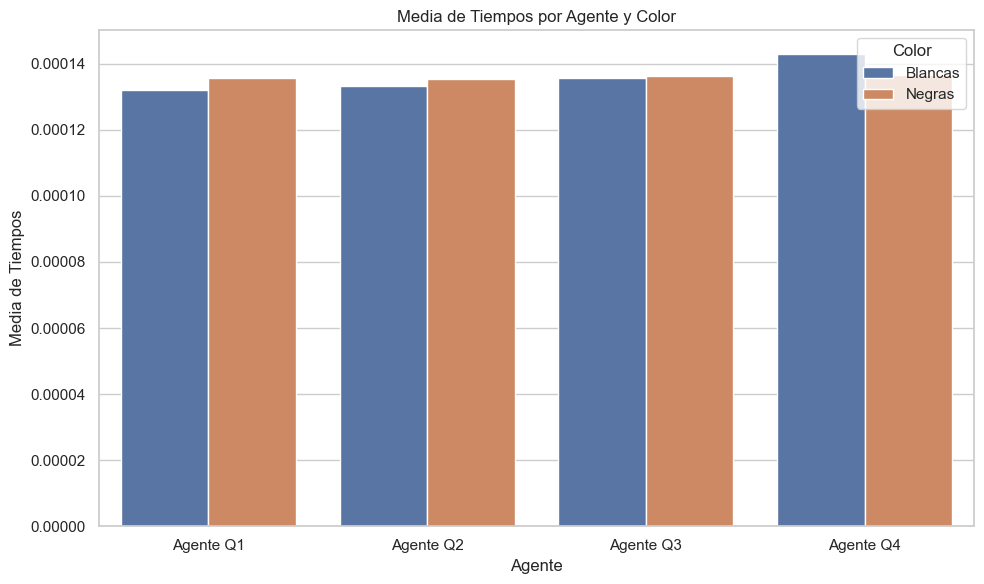

In [105]:
tiempo_agentes = calcula_medias_variable(datos, "average_time")

print(tiempo_agentes)

# Extendemos el dataframe para que exista una columna 'Color' que indique si la ficha es blanca o negra
tiempo_agentes_extendido = pd.melt(tiempo_agentes, id_vars=['Agente'], value_vars=['Blancas', 'Negras'],
                                var_name='Color', value_name='Media_Tiempos')

# Mostramos la gráfica
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Agente', y='Media_Tiempos', hue='Color', data=tiempo_agentes_extendido)

plt.title('Media de Tiempos por Agente y Color')
plt.xlabel('Agente')
plt.ylabel('Media de Tiempos')
plt.legend(title='Color')

plt.tight_layout()
plt.show()

Con respecto al tiempo medio para realizar un movimiento, todos han obtenido casi los mismos resultados, diferenciandose por muy poco.

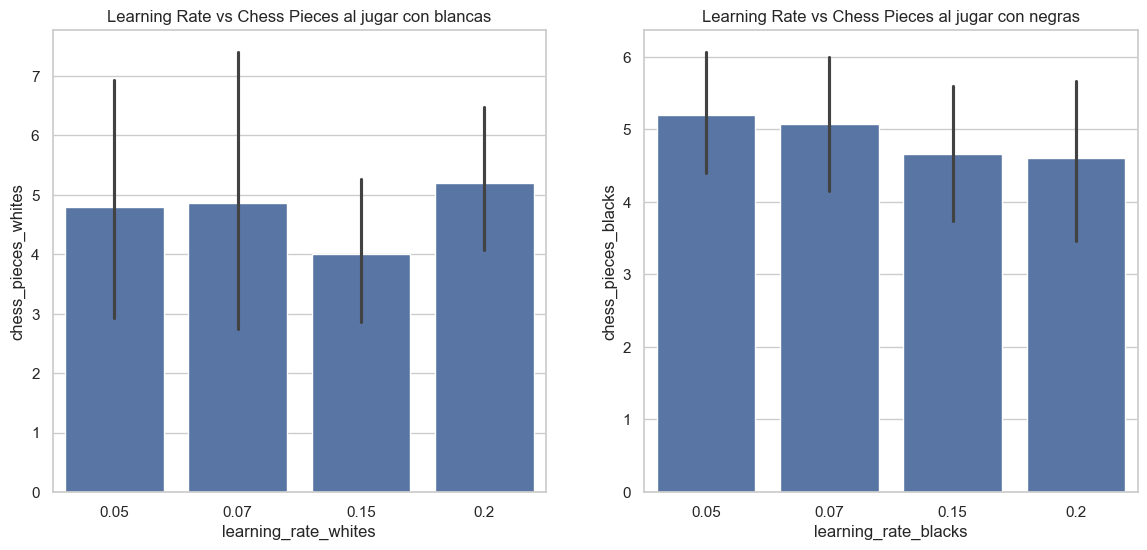

In [107]:
# ¿Cómo se relaciona el learning_rate con el número de piezas capturadas?
create_bar_plot(df, 'learning_rate', 'chess_pieces', 'Learning Rate vs Chess Pieces')

Esta gráfica muestra la relación entre la tasa de aprendizaje para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que a menor learning rate para las blancas mayor número de piezas capturadas, mientras que para las negras con un learning rate de 0.2 se ha conseguido mayor número de piezas capturadas.

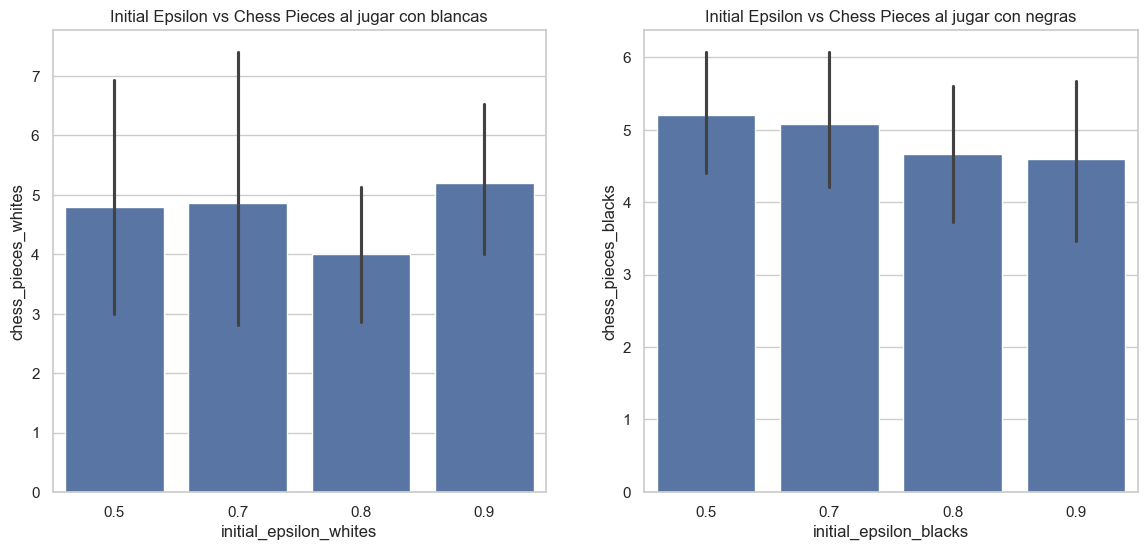

In [108]:
# ¿Cómo se relaciona el initial_epsilon con el número de piezas capturadas?
create_bar_plot(df, 'initial_epsilon', 'chess_pieces', 'Initial Epsilon vs Chess Pieces')

Esta gráfica muestra la relación entre el valor inicial de epsilon para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que a mayor valor inicial de epsilon para las blancas mayor número de piezas capturadas, mientras que para las negras con un valor inicial de epsilon de 0.9 se ha conseguido mayor número de piezas capturadas.

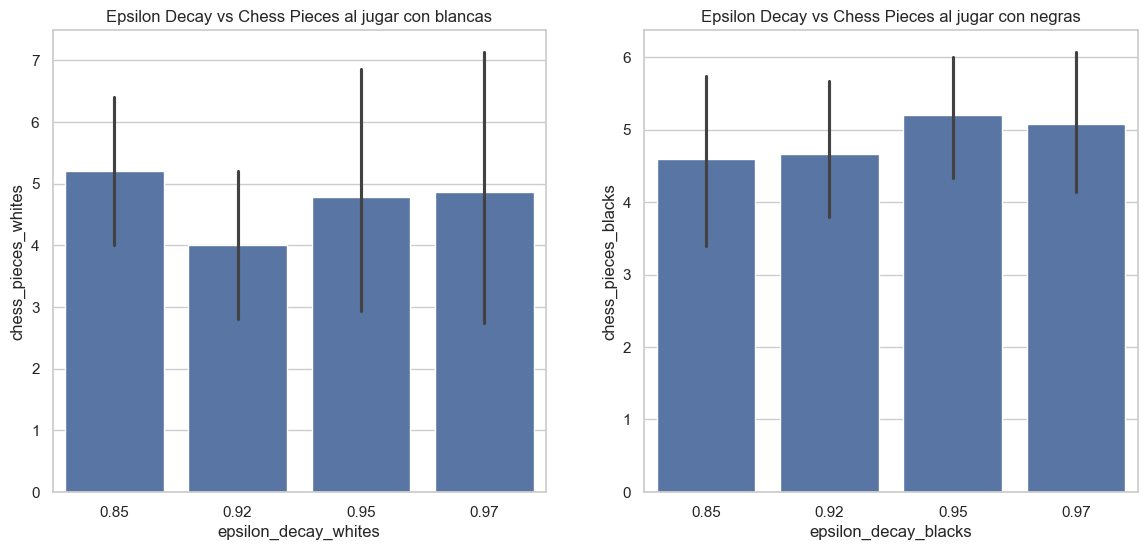

In [109]:
# ¿Cómo se relaciona el epsilon_decay con el número de piezas capturadas?
create_bar_plot(df, 'epsilon_decay', 'chess_pieces', 'Epsilon Decay vs Chess Pieces')

Esta gráfica muestra la relación entre el factor de decaimiento de epsilon para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que 0.95 como factor de decaimiento es el que ha obtenido capturar un mayor número de piezas para las blancas, mientras que para las negras con un factor de decaimiento de 0.85 se ha conseguido mayor número de piezas capturadas.

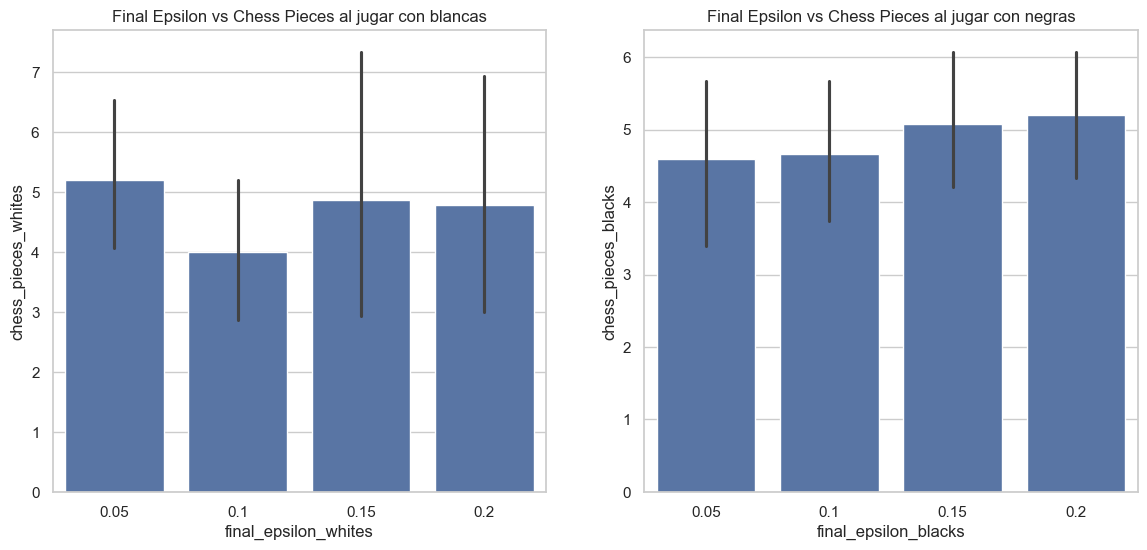

In [110]:
# ¿Cómo se relaciona el final_epsilon con el número de piezas capturadas?
create_bar_plot(df, 'final_epsilon', 'chess_pieces', 'Final Epsilon vs Chess Pieces')

Esta gráfica muestra la relación entre el valor final de epsilon para las fichas blancas y la cantidad de piezas de ajedrez capturadas por las blancas, diferenciando los resultados de las partidas. Observamos que a mayor valor final de epsilon para las blancas mayor número de piezas capturadas, mientras que para las negras con un valor final de epsilon de 0.05 se ha conseguido mayor número de piezas capturadas.

### Conclusiones

In [111]:
resultados_blancas = evaluar_agentes(datos, 'blancas')
resultados_blancas

,Ratio_Victorias,Fichas_Promedio,Tiempo_Promedio
whites,,,
Agente Q1,0.533333,5.200000,0.000132
Agente Q4,0.533333,4.866667,0.000143
Agente Q3,0.466667,4.000000,0.000136
Agente Q2,0.428571,4.785714,0.000133


Teniendo en cuenta todos los resultados, para las blancas la mejor configuración de hiperparámetros sería la del Agente 1, mientras que para las negras el Agente 4.

In [112]:
resultados_negras = evaluar_agentes(datos, 'negras')
resultados_negras

,Ratio_Victorias,Fichas_Promedio,Tiempo_Promedio
blacks,,,
Agente Q4,0.642857,5.071429,0.000137
Agente Q1,0.533333,4.600000,0.000136
Agente Q3,0.466667,4.666667,0.000136
Agente Q2,0.400000,5.200000,0.000135


Por lo tanto, la configuración de blancas sería:
* *Learning rate:* 0.2
* *Initial epsilon:* 0.9
* *Epsilon decay:* 0.85
* *Final epsilon:* 0.05

Y para las negras:
* *Learning rate:* 0.07
* *Initial epsilon:* 0.7
* *Epsilon decay:* 0.97
* *Final epsilon:* 0.15

## Q-Learning vs MCTS

Comparemos los agentes ganadores resultantes.

### Lectura de datos

In [123]:
df = pd.read_csv('./results/result_q_mcts.csv')
df.head()

,agent_white,agent_black,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result
0,1,4,0.000368,7,1.324514,6,Ganan blancas
1,1,4,0.000403,4,1.452691,3,Ganan blancas
2,1,4,0.000430,16,1.610722,3,Ganan blancas
3,1,4,0.000425,3,1.697882,7,Ganan blancas
4,2,3,1.710668,2,0.000424,6,Ganan blancas


## Preprocesado

In [124]:
agentes = {
    "Q-Learning white": 1,
    "Q-Learning black": 3,
    "MCTS white": 2,
    "MCTS black": 4
}

In [125]:
datos = df.copy()

# Creamos un mapeo inverso basado en simulations_number y exploration_factor para cada agente
agent_mapping = {
    agent_info: idx 
    for idx, agent_info in agentes.items()
}

# Función para obtener el nombre del agente basado en simulations_number y exploration_factor
def get_agent_name(agent):
    return agent_mapping.get(agent)

datos['agent_white'] = datos.apply(lambda row: get_agent_name(row["agent_white"]), axis=1)
datos['agent_black'] = datos.apply(lambda row: get_agent_name(row["agent_black"]), axis=1)

datos.head()

,agent_white,agent_black,average_time_whites,chess_pieces_whites,average_time_blacks,chess_pieces_blacks,result
0,Q-Learning white,MCTS black,0.000368,7,1.324514,6,Ganan blancas
1,Q-Learning white,MCTS black,0.000403,4,1.452691,3,Ganan blancas
2,Q-Learning white,MCTS black,0.000430,16,1.610722,3,Ganan blancas
3,Q-Learning white,MCTS black,0.000425,3,1.697882,7,Ganan blancas
4,MCTS white,Q-Learning black,1.710668,2,0.000424,6,Ganan blancas


## Visualización

Estos son los agentes que hemos utilizado:

In [126]:
# Identificar el agente ganador en cada juego
datos['winning_agent'] = datos.apply(lambda row: row['agent_white'] if row['result'] == 'Ganan blancas' else row['agent_black'], axis=1)

# Agrupar las victorias por agente
victories_by_agent = datos['winning_agent'].value_counts().reset_index()
victories_by_agent.columns = ['Agent', 'Victories']

# Identificar todos los agentes únicos
unique_agents = pd.unique(datos[['agent_white', 'agent_black']].values.ravel('K'))

# Crear un DataFrame para todos los agentes con victorias inicializadas en 0
all_agents_victories = pd.DataFrame({'Agent': unique_agents, 'Victories': 0})

# Actualizar el DataFrame con el número real de victorias
for agent in unique_agents:
    if agent in victories_by_agent['Agent'].values:
        all_agents_victories.loc[all_agents_victories['Agent'] == agent, 'Victories'] = victories_by_agent.loc[victories_by_agent['Agent'] == agent, 'Victories'].values[0]

all_agents_victories.sort_values(by='Victories', ascending=False, inplace=True)
all_agents_victories.reset_index(drop=True, inplace=True)
all_agents_victories


,Agent,Victories
0,Q-Learning white,4
1,MCTS white,4
2,Q-Learning black,1
3,MCTS black,0


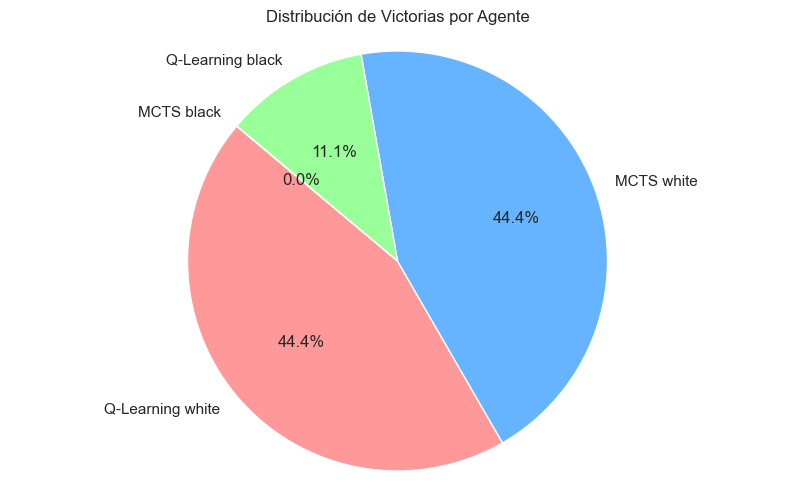

In [127]:
labels = all_agents_victories['Agent']
sizes = all_agents_victories['Victories']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Distribución de Victorias por Agente')

plt.show()

Podemos observar que el Agente 1 y 2 son los que mas victorias han obtenido. El agente 4 no ha conseguido ninguna victoria, por lo que en partidas ganadas Q-Learning ha obtenido mejores resultados que MCTS.

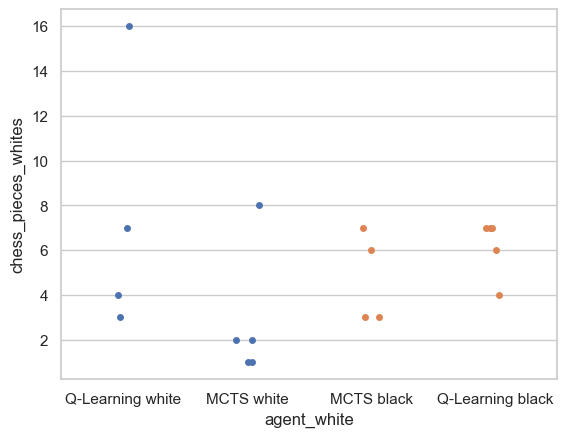

In [137]:
sns.stripplot(data=datos, x="agent_white", y="chess_pieces_whites")
sns.stripplot(data=datos, x="agent_black", y="chess_pieces_blacks")
plt.show()

In [133]:
avg_captured_whites = datos.groupby('agent_white')['chess_pieces_whites'].mean()
avg_captured_blacks = datos.groupby('agent_black')['chess_pieces_blacks'].mean()

avg_captured_data = pd.DataFrame({'Agent': unique_agents})
avg_captured_data['Avg_Captured_as_White'] = avg_captured_data['Agent'].map(avg_captured_whites).fillna(0)
avg_captured_data['Avg_Captured_as_Black'] = avg_captured_data['Agent'].map(avg_captured_blacks).fillna(0)

avg_captured_data['Avg_Captured'] = avg_captured_data['Avg_Captured_as_White'] + avg_captured_data['Avg_Captured_as_Black']

avg_captured_data.drop(['Avg_Captured_as_White', 'Avg_Captured_as_Black'], axis=1, inplace=True)

avg_captured_data

,Agent,Avg_Captured
0,Q-Learning white,7.50
1,MCTS white,2.80
2,MCTS black,4.75
3,Q-Learning black,6.20


<Axes: xlabel='Agent', ylabel='Avg_Captured'>

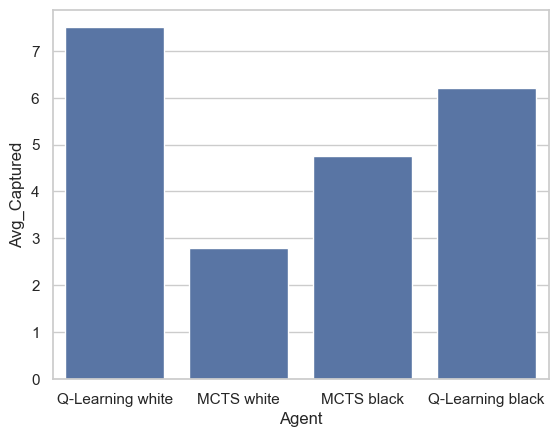

In [135]:
sns.barplot(data=avg_captured_data, x="Agent", y="Avg_Captured")

En este caso los Agentes de MCTS son los que más fichas han capturado frente a Q-Learning.

In [144]:
avg_total_time_whites = datos.groupby('agent_white')['average_time_whites'].mean()
avg_total_time_blacks = datos.groupby('agent_black')['average_time_blacks'].mean()

avg_total_time_data = pd.DataFrame({'Agent': unique_agents})
avg_total_time_data['Avg_Total_Time_as_White'] = avg_total_time_data['Agent'].map(avg_total_time_whites).fillna(0)
avg_total_time_data['Avg_Total_Time_as_Black'] = avg_total_time_data['Agent'].map(avg_total_time_blacks).fillna(0)

avg_total_time_data['Avg_Total_Time'] = avg_total_time_data['Avg_Total_Time_as_White'] + avg_total_time_data['Avg_Total_Time_as_Black']

avg_total_time_data.drop(['Avg_Total_Time_as_White', 'Avg_Total_Time_as_Black'], axis=1, inplace=True)

avg_total_time_data

,Agent,Avg_Total_Time
0,Q-Learning white,0.000407
1,MCTS white,1.589340
2,MCTS black,1.521452
3,Q-Learning black,0.000400


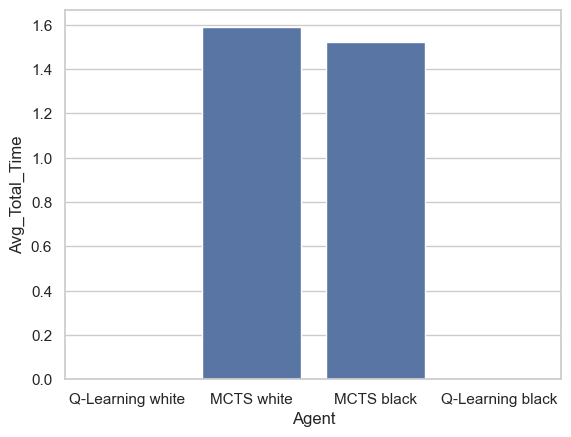

In [145]:
sns.barplot(data=avg_total_time_data, x="Agent", y="Avg_Total_Time")

plt.show()

En este caso el tiempo de los Agentes de Q-Learning son casi 10000 más pequeños que los de MCTS, por lo que no son perceptibles en la gráfica.


### Conclusiones

Hemos podido observar como los Agentes de Q-Learning han ganado más partidas que los de MCTS, pero a su vez tienen una menor media de fichas capturas y un menor tiempo de juego. Por lo que podemos concluir que los Agentes de Q-Learning son más eficientes que los de MCTS.